In [26]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for legend handle

In [27]:
acs = pd.read_csv("acs_demographic_data.csv", index_col=0)
acs

,pct_black,pct_native,pct_asian,pct_hisp,pct_other,median_income,pct_college,pct_hs_grad,pct_device_access,pct_internet_access,GEOID
pct_white,,,,,,,,,,,
0.096892,0.035649,0.002285,0.818099,0.015539,0.060786,92228.0,0.747654,0.935871,0.959509,0.950920,60014421001
0.158522,0.000000,0.007330,0.796885,0.006109,0.051313,92228.0,0.747654,0.935871,0.959509,0.950920,60014421002
0.319734,0.047460,0.014988,0.499584,0.076603,0.075770,68202.0,0.664889,0.966279,0.988090,0.951478,60014422004
0.222798,0.000000,0.000000,0.758420,0.012953,0.011658,68202.0,0.664889,0.966279,0.988090,0.951478,60014422003
0.212544,0.000000,0.000000,0.721254,0.040070,0.052265,68202.0,0.664889,0.966279,0.988090,0.951478,60014422002
...,...,...,...,...,...,...,...,...,...,...,...
0.319478,0.044348,0.003826,0.472174,0.080696,0.157217,85547.0,0.756948,0.964376,1.000000,0.956181,60014501011
0.386385,0.030681,0.000000,0.440077,0.123682,0.038351,4831.0,0.950355,1.000000,0.807692,0.653846,60014226001
0.578383,0.016914,0.000000,0.193482,0.122937,0.161304,68049.0,0.547694,0.965409,0.994444,0.974444,60014301021


In [28]:
df = pd.read_csv("../holc_grade_w_distance.csv")
df

,Delivery Address,Accuracy Type,Census Tra,City,Geoid_Tract,Holc Grade,Holc Id,Id,Link,Name,...,GEOID,Geometry,Holc Area,Holc Prop,Latitude,Longitude,Restaurant Latitude,Restaurant Longitude,Tract Prop,Tractce
0,2444 Durant Ave Berkeley CA,rooftop,422800,Berkeley,6001422800,C,C6,17,https://postmates.com/store/smitten-ice-cream-...,Smitten Ice Cream - Rockridge,...,60014228002,MultiPolygon,0.248861,0.446300,37.867235,-122.260066,37.846135,-122.251789,0.704071,422800
1,4223 Atlas Ave Oakland CA,rooftop,406900,Oakland,6001406900,B,B30,17,https://postmates.com/store/thai-table/xtqECmu...,Thai Table,...,60014069001,Polygon,0.090340,0.595744,37.797276,-122.188556,37.868542,-122.296333,0.159680,406900
2,2444 Durant Ave Berkeley CA,rooftop,422800,Berkeley,6001422800,C,C6,17,https://postmates.com/store/chipotle-mexican-g...,Chipotle Mexican Grill (2225 Shattuck Ave),...,60014228002,MultiPolygon,0.248861,0.446300,37.867235,-122.260066,37.868858,-122.267494,0.704071,422800
3,2444 Durant Ave Berkeley CA,rooftop,422800,Berkeley,6001422800,C,C6,17,https://postmates.com/store/yi-fang-taiwan-fru...,Yi Fang Taiwan Fruit Tea,...,60014228002,MultiPolygon,0.248861,0.446300,37.867235,-122.260066,37.868563,-122.258680,0.704071,422800
4,2920 Avalon Ave Berkeley CA,rooftop,423700,Berkeley,6001423700,B,B8,17,https://postmates.com/store/dickeys-barbecue-p...,Dickey's Barbecue Pit (CA-2043) 2353 E 12th St...,...,60014237002,MultiPolygon,0.464799,0.217964,37.859562,-122.248932,37.781594,-122.235954,0.352653,423700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38439,7632 Valentine St Oakland CA,rooftop,408300,Oakland,6001408300,D,D16,17,https://postmates.com/store/shake-shack-1954-t...,Shake Shack (1954 Telegraph Avenue),...,60014083002,Polygon,0.461566,0.692271,37.772157,-122.160807,37.808889,-122.269107,0.543861,408300
38440,7632 Valentine St Oakland CA,rooftop,408300,Oakland,6001408300,D,D16,17,https://postmates.com/store/red-sea-restaurant...,Red Sea Restaurant & Bar,...,60014083002,Polygon,0.461566,0.692271,37.772157,-122.160807,37.838295,-122.261262,0.543861,408300
38441,7632 Valentine St Oakland CA,rooftop,408300,Oakland,6001408300,D,D16,17,https://postmates.com/store/the-italian-homema...,The Italian Homemade Company (Berkeley),...,60014083002,Polygon,0.461566,0.692271,37.772157,-122.160807,37.858156,-122.252840,0.543861,408300
38442,7632 Valentine St Oakland CA,rooftop,408300,Oakland,6001408300,D,D16,17,https://postmates.com/store/sushi-island/Z3acg...,Sushi Island,...,60014083002,Polygon,0.461566,0.692271,37.772157,-122.160807,37.900255,-122.185577,0.543861,408300


In [29]:
#Confirm a few GEOID (i.e. block group Geoid only have one letter grade)
print(df[df.GEOID == 60014072003]['Holc Grade'].values)
df[df.GEOID ==  60014083002]['Holc Grade'].values

['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']


array(['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D'], dtype=object)

In [30]:
merged = df.merge(acs, on="GEOID", how="left")

In [31]:
merged.columns

Index(['Delivery Address', 'Accuracy Type', 'Census Tra', 'City',
       'Geoid_Tract', 'Holc Grade', 'Holc Id', 'Id', 'Link', 'Name',
       'Namelsad', 'Number', 'Polygon Id', 'Restaurant Address', 'Source',
       'St Name', 'State', 'Street', 'Unit Number', 'Unit Type', 'Wait Time',
       'Zip', 'Accuracy Score', 'Aland', 'Awater', 'Blkgrpce', 'Delivery Fee',
       'Distance', 'F1', 'GEOID', 'Geometry', 'Holc Area', 'Holc Prop',
       'Latitude', 'Longitude', 'Restaurant Latitude', 'Restaurant Longitude',
       'Tract Prop', 'Tractce', 'pct_black', 'pct_native', 'pct_asian',
       'pct_hisp', 'pct_other', 'median_income', 'pct_college', 'pct_hs_grad',
       'pct_device_access', 'pct_internet_access'],
      dtype='object')

In [32]:
#Data cleanup per Margo
merged = merged[merged['Distance'] < 25]

In [48]:
merged.to_csv("../all_data_merged.csv")

## Some Viz

In [71]:
grades = merged.groupby([ "Holc Grade"])["Delivery Address"].agg("count")
temp = pd.DataFrame(grades)
temp = temp.reset_index()
temp.columns= ["Holc Grade", "Delivery Requests"]
temp

,Holc Grade,Delivery Requests
0,A,2853
1,B,8304
2,C,17556
3,D,9629


In [73]:
colors = {'A': 'green', 'B' : 'blue', 'C' : 'yellow', 'D' : 'red'}

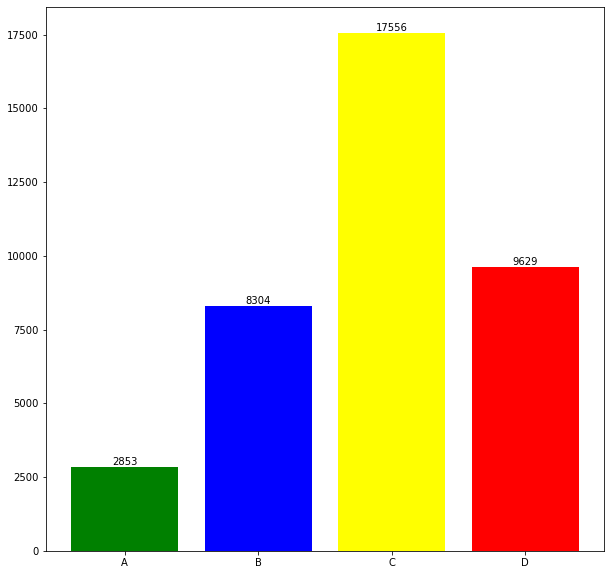

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(temp["Holc Grade"], temp['Delivery Requests'],color=temp["Holc Grade"].map(colors))

rects = ax.patches

# Make some labels.
labels = [i.get_height() for i in rects]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [51]:
#Confirm only one grade per address
sum(merged.groupby(["Delivery Address"])["Holc Grade"].agg("nunique")!=1)

0

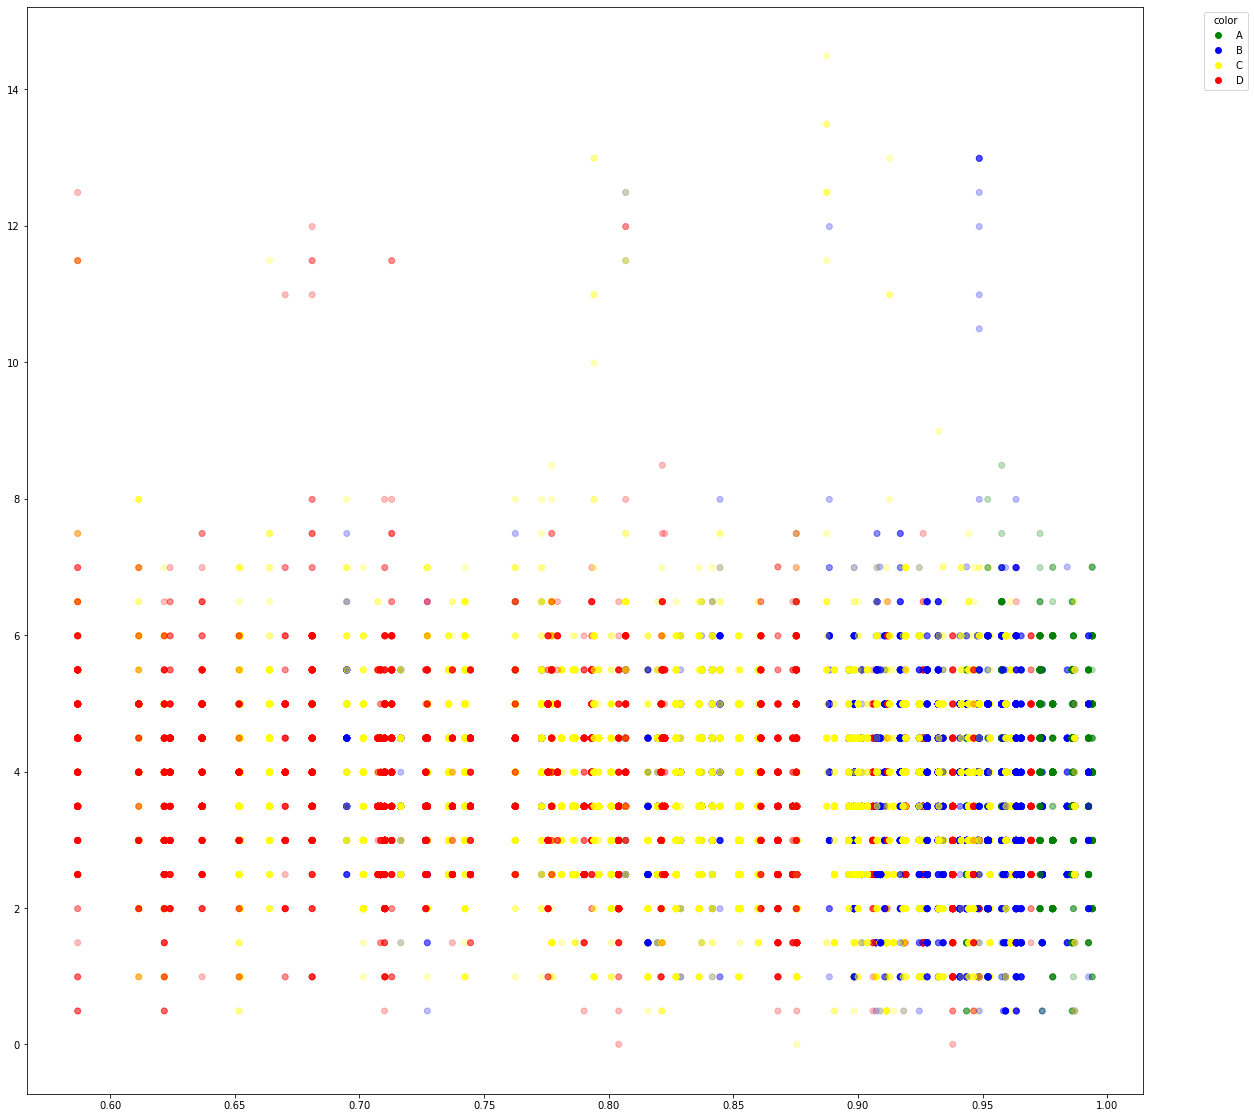

In [93]:
#Filter df to smaller distances?
temp = merged[merged['Distance'] < 5]


colors = {'A': 'green', 'B' : 'blue', 'C' : 'yellow', 'D' : 'red'}

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(temp['pct_internet_access'], temp['Delivery Fee'], c=temp['Holc Grade'].map(colors), alpha = 0.25)


handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(temp['Distance'], temp['Delivery Fee'], c=temp['worst_grade'].map(colors), alpha = 0.25)


handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

In [83]:
#Filter out NAs from distance and dlivery fee columns

df_dropped = merged.dropna(subset=['Distance','Delivery Fee'])

In [85]:
a = np.polyfit(df_dropped[df_dropped["Holc Grade"] =='A'].Distance, df_dropped[df_dropped["Holc Grade"] =='A']['Delivery Fee'], deg=1)
a_line = a[1] + a[0] * df_dropped[df_dropped["Holc Grade"] =='A'].Distance


b = np.polyfit(df_dropped[df_dropped["Holc Grade"] =='B'].Distance, df_dropped[df_dropped["Holc Grade"] =='B']['Delivery Fee'], deg=1)
b_line = b[1] + b[0] * df_dropped[df_dropped["Holc Grade"] =='B'].Distance

c = np.polyfit(df_dropped[df_dropped["Holc Grade"] =='C'].Distance, df_dropped[df_dropped["Holc Grade"] =='C']['Delivery Fee'], deg=1)
c_line = c[1] + c[0] * df_dropped[df_dropped["Holc Grade"] =='C'].Distance

d = np.polyfit(df_dropped[df_dropped["Holc Grade"] =='D'].Distance, df_dropped[df_dropped["Holc Grade"] =='D']['Delivery Fee'], deg=1)
d_line = d[1] + d[0] * df_dropped[df_dropped["Holc Grade"] =='D'].Distance



In [91]:
pd.DataFrame({"Holc Grade" : ["A", "B", "C", "D"], "Best-Fit Slope" : [a[0], b[0], c[0], d[0]]})

,Holc Grade,Best-Fit Slope
0,A,0.770389
1,B,0.892588
2,C,0.876661
3,D,0.808881


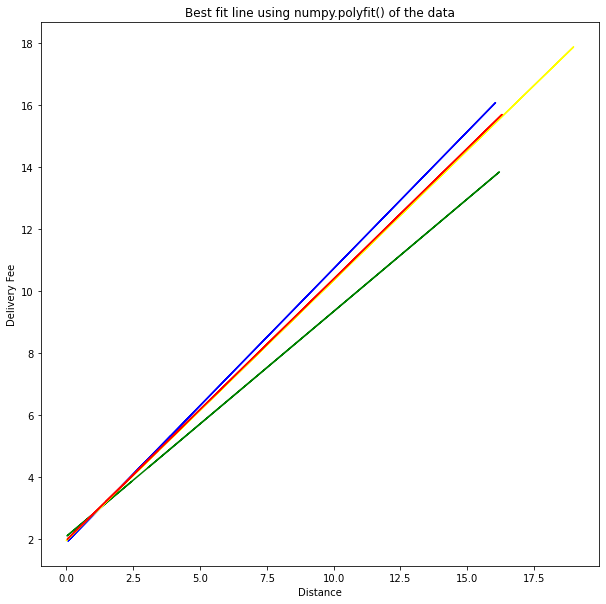

In [101]:
# Plotting the data points and the best fit line

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(df_dropped[df_dropped.worst_grade =='A'].Distance, a_line, 'r', color='green')
plt.plot(df_dropped[df_dropped.worst_grade =='B'].Distance, b_line, 'r', color='blue')
plt.plot(df_dropped[df_dropped.worst_grade =='C'].Distance, c_line, 'r', color='yellow')
plt.plot(df_dropped[df_dropped.worst_grade =='D'].Distance, d_line, 'r', color='red')

ax.set_title('Best fit line using numpy.polyfit() of the data')
ax.set_xlabel('Distance')
ax.set_ylabel('Delivery Fee')

plt.show()

### Some Summarizations of the Data

In [107]:
#What if we find the average delivery fee for a requested address?

temp = merged.groupby("Delivery Address")[["Delivery Fee", "pct_black", "Holc Grade", "Aland", 'pct_internet_access']].agg({"Delivery Fee":"mean", "Holc Grade":pd.Series.mode, "pct_black":"mean", "Aland":"mean", "pct_internet_access": "mean"})
temp

,Delivery Fee,Holc Grade,pct_black,Aland,pct_internet_access
Delivery Address,,,,,
1 Overlake Ct Oakland CA,4.646863,B,0.001094,508580,0.957712
1012 34th Ave Oakland CA,4.627500,D,0.033051,538610,0.708475
1026 Linden St Oakland CA,5.080226,D,0.471163,263581,0.821526
10316 Longfellow Ave Oakland CA,7.523981,C,0.733382,164563,0.794144
10320 Shaw St Oakland CA,7.475294,C,0.657560,455737,0.912727
...,...,...,...,...,...
9719 Walnut St Oakland CA,5.757677,D,0.293032,199382,0.777126
975 Vermont St Oakland CA,4.066923,B,0.087472,234637,0.927784
977 Longridge Rd Oakland CA,3.673168,A,0.167553,198573,0.952114


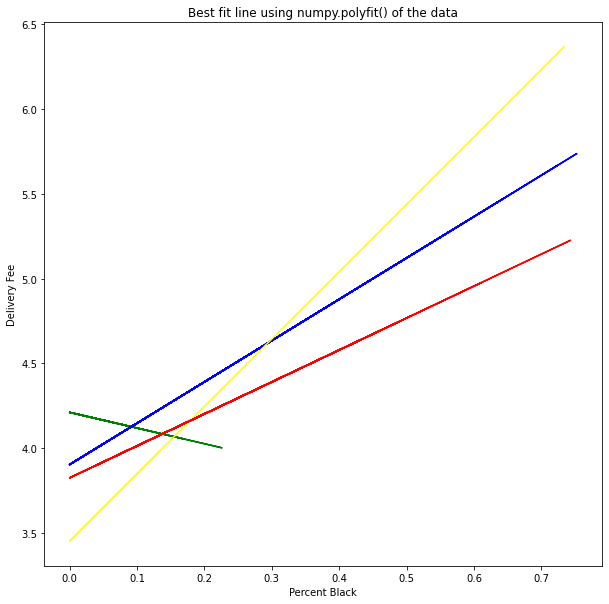

In [110]:
a = np.polyfit(temp[temp["Holc Grade"] =='A'].pct_black, temp[temp["Holc Grade"] =='A']['Delivery Fee'], deg=1)
a_line = a[1] + a[0] * temp[temp["Holc Grade"] =='A'].pct_black


b = np.polyfit(temp[temp["Holc Grade"] =='B'].pct_black, temp[temp["Holc Grade"] =='B']['Delivery Fee'], deg=1)
b_line = b[1] + b[0] * temp[temp["Holc Grade"] =='B'].pct_black

c = np.polyfit(temp[temp["Holc Grade"] =='C'].pct_black, temp[temp["Holc Grade"] =='C']['Delivery Fee'], deg=1)
c_line = c[1] + c[0] * temp[temp["Holc Grade"] =='C'].pct_black

d = np.polyfit(temp[temp["Holc Grade"] =='D'].pct_black, temp[temp["Holc Grade"] =='D']['Delivery Fee'], deg=1)
d_line = d[1] + d[0] * temp[temp["Holc Grade"] =='D'].pct_black


# Plotting the data points and the best fit line

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(temp[temp["Holc Grade"] =='A'].pct_black, a_line, 'r', color='green')
plt.plot(temp[temp["Holc Grade"] =='B'].pct_black, b_line, 'r', color='blue')
plt.plot(temp[temp["Holc Grade"] =='C'].pct_black, c_line, 'r', color='yellow')
plt.plot(temp[temp["Holc Grade"] =='D'].pct_black, d_line, 'r', color='red')

ax.set_title('Best fit line using numpy.polyfit() of the data')
ax.set_xlabel('Percent Black')
ax.set_ylabel('Delivery Fee')

plt.show()